**Mount Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import necessary libraries**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Load the dataset**

In [17]:
fraud_train = pd.read_csv('/content/drive/MyDrive/fraudTrain.csv')
fraud_test = pd.read_csv('/content/drive/MyDrive/fraudTest.csv')

**Combine train and test data for preprocessing**

In [18]:
fraud_data = pd.concat([fraud_train, fraud_test], axis=0, ignore_index=True)

**Feature engineering and preprocessing**

In [19]:
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
X = fraud_data[numerical_features]
y = fraud_data['is_fraud']

**Split data into train and test**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Standardize the features**

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Build and train the Logistic Regression model**

In [22]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

**Logistic Regression Evaluation**

In [23]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
confusion_mat_lr = confusion_matrix(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)

**Display Model Evaluation Metrics for Logistic Regression**

In [24]:
print("\nLogistic Regression Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print("\nConfusion Matrix:")
print(confusion_mat_lr)
print("\nClassification Report:")
print(classification_rep_lr)


Logistic Regression Model Evaluation Metrics:
Accuracy: 0.9943

Confusion Matrix:
[[368367    159]
 [  1953      0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479



**Graph for Logistic Regression**

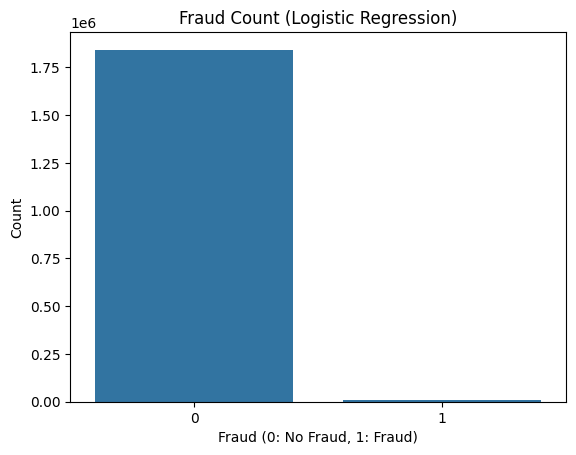

In [26]:
sns.countplot(x='is_fraud', data=fraud_data)
plt.title('Fraud Count (Logistic Regression)')
plt.xlabel('Fraud (0: No Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()